<a href="https://colab.research.google.com/github/Asif123375/Computational-Physics/blob/main/Boundary_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline

def fun(i):
  """ This function will calculate the boundary value of u(x,t=0)= sin(pi*x), this condition might be change for some other problems"""
  """ return all the possible value of u for different value of x at range(0->1, step_size = 0.1):"""
  pi = 3.1416
  x = np.sin(pi*i)
  return x
def PDE_Hyperbolic_Equation(h,k,c, limit_of_t, limit_of_x):
  """This Function Solve the numerical solution of PDE of Hyperbolic Equation like One Dimensional Wave Equation"""
  """Later I modify this function for any value of h,k,c"""
  """For the case Simplicity we choose the value of h,k such that lamda=1"""
  """This function Return u,x,t"""

  # For this Problem we solve 1D wave equation
  # Working Formula For this problem is U(i,j+1) = 2*(1-lamda)*U(i,j) + lamda*{U(i-1,j)+U(i+1,j)} -U(i, j-1)----------------(1)
  # Where lamda = k^2*c^2/h^2
  # In our Problem one boundary condition was del(u)/del(t) = 0, it means U(i, j+1) = U(i,j-1) ; Using central difference formula
  # Then From(2) Working formula Should be U(i, j+1) = (1-lamda)*U(i,j) + 0.5*lamda*{U(i-1,j)+U(i+1,j)}---------------------------------(3)
  # Taking value of h,k & c
  lamda = (k**2*c**2/h**2) 
  total_x_val = int((limit_of_x/h)+1)
  total_t_val = int((limit_of_t/k)+1)
  x = np.linspace(0,limit_of_x,total_x_val)
  t = np.linspace(0,limit_of_t,total_t_val)
  # initialize the u as a empty matrix of size (len(x) by len(t)).
  u = np.zeros((len(t), len(x)))

  # fill the value in u which is given as condition by the help of a for loop
  for i in range(len(x)-1):
    u[0,i] = fun(x[i])

  # finaly using reducing working formula calculate all possibe value of u
  for i in range(1, len(t)):
    for j in range(1, len(x)-1):
      u[i,j] = (1-lamda)*u[i-1,j] + 0.5*(u[i-1, j-1] + u[i-1, j+1])
  return u,t,x,lamda


In [ ]:
get_U,t,x,lamda = PDE_Hyperbolic_Equation(h=0.05,k=0.04,c=1,limit_of_t=1.5,limit_of_x=5)
df = pd.DataFrame(get_U)
df.index = t
columns = dict()
for i in range(len(x)):
  columns[i] =(i*(1/(len(x)-1)))
df = df.rename(columns=columns)
df

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
0.000000,0.0,0.156435,0.309018,0.453991,0.587786,0.707108,0.809018,0.891008,0.951057,0.987689,1.000000,0.987688,0.951055,0.891004,0.809014,0.707103,0.587780,0.453985,0.309011,0.156428,-0.000007,-0.156442,-0.309025,-0.453998,-0.587792,-0.707113,-0.809023,-0.891011,-0.951060,-0.987690,-1.000000,-0.987687,-0.951053,-0.891001,-0.809010,-0.707098,-0.587775,-0.453978,-0.309004,-0.156420,...,-0.156457,-0.309039,-0.454011,-0.587804,-0.707124,-0.809031,-0.891018,-0.951064,-0.987692,-1.000000,-0.987684,-0.951048,-0.890994,-0.809001,-0.707087,-0.587763,-0.453965,-0.308990,-0.156406,0.000029,0.156464,0.309046,0.454018,0.587810,0.707129,0.809036,0.891021,0.951067,0.987693,1.000000,0.987683,0.951046,0.890991,0.808997,0.707082,0.587757,0.453959,0.308983,0.156399,0.0
0.040541,0.0,0.210825,0.416460,0.611839,0.792153,0.952961,1.090304,1.200801,1.281729,1.331097,1.347688,1.331095,1.281726,1.200796,1.090299,0.952954,0.792145,0.611830,0.416450,0.210816,-0.000010,-0.210835,-0.416469,-0.611848,-0.792161,-0.952968,-1.090310,-1.200805,-1.281732,-1.331098,-1.347688,-1.331094,-1.281723,-1.200792,-1.090293,-0.952947,-0.792137,-0.611821,-0.416441,-0.210806,...,-0.210855,-0.416488,-0.611865,-0.792177,-0.952982,-1.090322,-1.200814,-1.281738,-1.331101,-1.347688,-1.331091,-1.281717,-1.200783,-1.090281,-0.952933,-0.792121,-0.611804,-0.416422,-0.210786,0.000040,0.210864,0.416497,0.611874,0.792185,0.952989,1.090328,1.200819,1.281741,1.331103,1.347688,1.331089,1.281714,1.200778,1.090275,0.952926,0.792113,0.611795,0.416412,0.210795,0.0
0.081081,0.0,0.284127,0.561258,0.824568,1.067575,1.284295,1.469391,1.618305,1.727371,1.793903,1.816264,1.793901,1.727367,1.618299,1.469383,1.284285,1.067564,0.824556,0.561245,0.284114,-0.000013,-0.284140,-0.561270,-0.824580,-1.067586,-1.284304,-1.469398,-1.618311,-1.727375,-1.793906,-1.816264,-1.793899,-1.727363,-1.618293,-1.469375,-1.284276,-1.067554,-0.824544,-0.561232,-0.284101,...,-0.284166,-0.561296,-0.824604,-1.067608,-1.284323,-1.469414,-1.618323,-1.727383,-1.793910,-1.816264,-1.793895,-1.727355,-1.618281,-1.469359,-1.284257,-1.067532,-0.824521,-0.561207,-0.284074,0.000053,0.284180,0.561308,0.824616,1.067618,1.284332,1.469422,1.618329,1.727388,1.793912,1.816264,1.793893,1.727350,1.618275,1.469351,1.284248,1.067521,0.824509,0.561203,0.284092,0.0
0.121622,0.0,0.382914,0.756400,1.111261,1.438759,1.730829,1.980280,2.180971,2.327958,2.417623,2.447757,2.417620,2.327952,2.180962,1.980270,1.730816,1.438744,1.111245,0.756383,0.382897,-0.000018,-0.382932,-0.756417,-1.111277,-1.438773,-1.730842,-1.980291,-2.180979,-2.327963,-2.417625,-2.447757,-2.417617,-2.327947,-2.180954,-1.980259,-1.730804,-1.438729,-1.111229,-0.756366,-0.382879,...,-0.382968,-0.756452,-1.111309,-1.438802,-1.730867,-1.980312,-2.180995,-2.327974,-2.417631,-2.447757,-2.417611,-2.327936,-2.180938,-1.980238,-1.730778,-1.438700,-1.111197,-0.756332,-0.382843,0.000072,0.382986,0.756469,1.111325,1.438817,1.730880,1.980323,2.181003,2.327980,2.417634,2.447757,2.417609,2.327930,2.180930,1.980228,1.730765,1.438686,1.111185,0.756334,0.382875,0.0
0.162162,0.0,0.516049,1.019392,1.497633,1.938998,2.332618,2.668801,2.939269,3.137361,3.258202,3.298814,3.258198,3.137354,2.939258,2.668787,2.332601,1.938978,1.497612,1.019369,0.516025,-0.000024,-0.516073,-1.019415,-1.497655,-1.939018,-2.332635,-2.668815,-2.939280,-3.137369,-3.258205,-3.298814,-3.258194,-3.137346,-2.939247,-2.668772,-2.332584,-1.938959,-1.497590,-1.019346,-0.516002,...,-0.516121,-1.019461,-1.497698,-1.939057,-2.332669,-2.668843,-2.939302,-3.137384,-3.258213,-3.298814,-3.258187,-3.137331,-2.939225,-2.668744,-2.332549,-1.938920

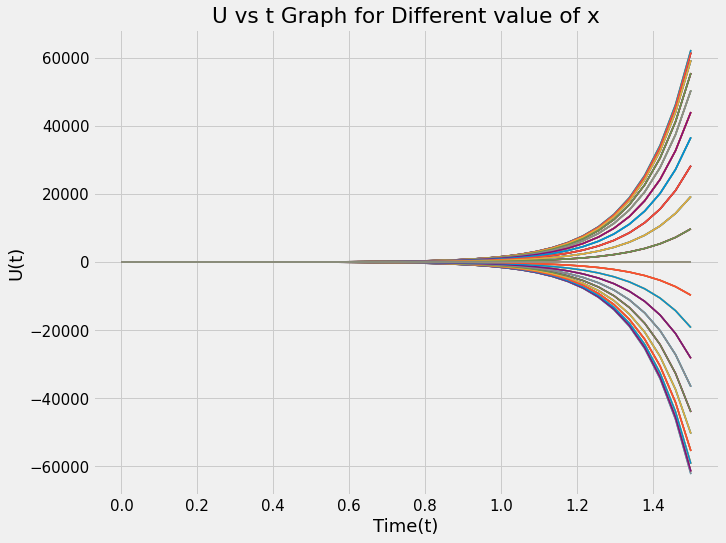

In [ ]:
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['lines.linewidth']=1.5
ax = df.plot(legend = False, figsize = (10,8), grid=True,)
ax.set_title("U vs t Graph for Different value of x")
ax.set_xlabel("Time(t)")
ax.set_ylabel("U(t)");

Text(0, 0.5, 'U(x)')

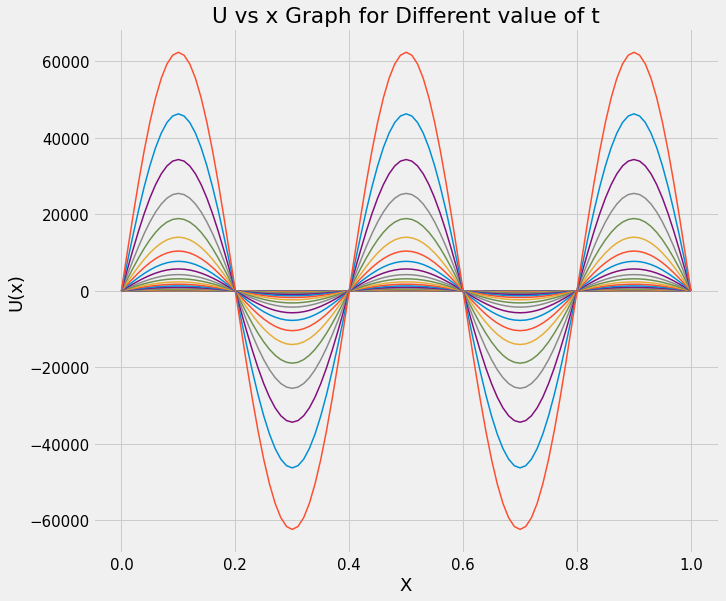

In [ ]:
df1 = df.T.copy()
ax1 = df1.plot(legend = False, figsize = (10,9), grid=True,)
ax1.set_title("U vs x Graph for Different value of t")
ax1.set_xlabel("X")
ax1.set_ylabel("U(x)")